# Joining Tables Together and Engineering New Features

In this query, I performed several feature engineering steps while joining tables containing user, gesture, and sensor data. The goal was to create meaningful input features for gesture classification.

**Averaged Sensor Measurements**

For each signal recording, I calculated the average of each sensor dimension (acceleration, gravity, and rotation).

Why it helps: These aggregates provide a compact summary of the gesture's motion characteristics. Rather than feeding raw time-series data, which can be high-dimensional and noisy, these summary statistics give a stable, interpretable signal that differentiates gestures.

Assumption: Different gestures should produce distinguishable average values across these sensor axes.

**Gesture Duration in Seconds**

What it is: Converts the gesture duration from milliseconds to seconds for better readability and scale compatibility.

Why it helps: Gesture duration may be a key differentiator. Some gestures may naturally take longer than others. Using seconds makes this feature more interpretable.

**Hour When Signal was Recorded**

What it is: Extracts the hour (0–23) when the signal was recorded.

Why it helps: Time-of-day could correlate with user behavior or performance (such as different gesture styles in morning vs. evening), which might indirectly help classification. Useful for capturing potential circadian patterns or session structure.

In [0]:
%sql
---Joining the users, signal_playbook, signal_recordings_header, and signal_recordings_detail tables together
---Feature engineering while joining the tables together
SELECT
  ---Recording info
  p.play_name AS gesture_play,

  ---Playbook info
  p.gesture,

  ---Header info
  h.signal_ID,
  h.play_ID,
  h.user_ID,
  h.time_stamp, 

  ---Sensor aggregates
  AVG(d.accel_x) AS avg_accel_x,
  AVG(d.accel_y) AS avg_accel_y,
  AVG(d.accel_z) AS avg_accel_z,
  AVG(d.accel_grav_x) AS avg_grav_x,
  AVG(d.accel_grav_y) AS avg_grav_y,
  AVG(d.accel_grav_z) AS avg_grav_z,
  AVG(d.rotation_rate_alpha) AS avg_rot_alpha,
  AVG(d.rotation_rate_beta) AS avg_rot_beta,
  AVG(d.rotation_rate_gamma) AS avg_rot_gamma,

  ---Additional engineered features
  (h.duration_ms / 1000) AS duration_seconds,
  HOUR(h.time_stamp) AS signal_hour

FROM databases.eshin2.signal_recordings_header h
INNER JOIN databases.eshin2.signal_recordings_detail d ON h.signal_ID = d.signal_ID
INNER JOIN databases.eshin2.signal_playbook p ON h.play_ID = p.play_ID
INNER JOIN databases.eshin2.users u ON h.user_ID = u.user_ID

GROUP BY
  p.gesture, p.play_name, h.signal_ID, h.play_ID, h.user_ID, h.time_stamp, h.duration_ms

gesture_play,gesture,signal_ID,play_ID,user_ID,time_stamp,avg_accel_x,avg_accel_y,avg_accel_z,avg_grav_x,avg_grav_y,avg_grav_z,avg_rot_alpha,avg_rot_beta,avg_rot_gamma,duration_seconds,signal_hour
Collapse Left,<,O6BXBNcgv1f3Usl7FV9q,collapse_left,EMr3nqqL6ygD1MYdgxrJosFUzn63,2025-07-12T17:15:49.242Z,-0.2744148801198791,0.5688674062090496,-0.5183392896635901,-0.9088188877734559,-5.753241456339878,-6.433874007840571,-17.143533027124338,11.159923833110668,7.402687095795068,3.467,17
Collapse Left,<,xnQr3xdH4SP8uEb33vCg,collapse_left,A7P5QM0SuEh30sbaJVr4DwwQvpz2,2025-06-15T02:40:59.211Z,0.05899280575539578,-0.2820143884892087,0.8467625899280575,-1.1661870503597127,8.37122302158274,3.199280575539569,-17.58129496402879,-6.6115107913669044,-15.879136690647483,2.374,2
Touchdown Halo,O (Circle x2),QSsHQYIanuigPYEPpprt,touchdown_halo,yyJqKEAv0qZCzmksNJA26VVizfE3,2025-06-15T02:41:51.791Z,0.031042974131277143,0.44517306945517615,-0.9098444805097645,-0.12872064767093466,-8.572632559153682,-3.2107645940917666,2.8337223515959344,-2.155986236968474,8.01812525587317,4.341,2
Collapse Left,<,UqxGJUKKSdqQISJWJWG9,collapse_left,SlZVgkV1ElRlZJs1t5UE4rr99vE3,2025-06-15T02:50:37.551Z,-0.7891413799413156,2.475497610204855,-1.9667526826358583,-0.8387745401522936,-3.9030277549547567,-7.210103988457737,-50.32573698850957,4.804428293408731,4.246899301803691,1.839,2
Touchdown Halo,O (Circle x2),z7QhU8w2GZhAjkiEC1Ed,touchdown_halo,PIYoM7g2NPeWCyJzADmC8Q3AoNU2,2025-07-26T01:12:29.863Z,-0.5878729766514252,3.7738290268858665,-4.354251827227095,-2.202545811082349,-0.6286572137677654,-9.71811965304495,4.23067437022156,-48.11536975764149,53.12280951834883,4.407,1
Irish Surge,N,R3XJrzlmIIY2hm0nlZmU,irish_surge,SlZVgkV1ElRlZJs1t5UE4rr99vE3,2025-06-15T02:51:10.901Z,-1.8404924925764612,5.3336821992997345,-3.0843852562355316,-2.3617486348910104,-1.7672721800122662,-7.453046918067675,16.595611551728737,-11.854678826268984,-7.783212779446158,2.171,2
Touchdown Halo,O (Circle x2),vAjkZDQd0AGdrGz29QFk,touchdown_halo,PIYoM7g2NPeWCyJzADmC8Q3AoNU2,2025-07-19T20:07:00.23Z,-0.32898998113102873,1.186818859621206,-1.746957989236718,-4.1537165646902166,-5.866911921607824,-5.648683552987162,-4.054433787274606,-13.789582309177217,15.939561316790131,4.933,20
Touchdown Halo,O (Circle x2),UXMV6c0NqbXMzuasNl9G,touchdown_halo,A7P5QM0SuEh30sbaJVr4DwwQvpz2,2025-06-15T02:42:42.387Z,-0.4303738317757011,-1.022429906542056,3.1042056074766347,-1.3864485981308414,7.712149532710283,4.552336448598132,-5.4518691588785115,-7.897196261682253,26.544392523364493,3.61,2
Touchdown Halo,O (Circle x2),y7TAmPnBgwd1ZgINn8cz,touchdown_halo,PIYoM7g2NPeWCyJzADmC8Q3AoNU2,2025-07-20T02:22:17.587Z,0.16550708553727386,2.834210940070822,-2.7845204530123664,-4.004873090296024,-0.33360553584589253,-6.749921771052705,-19.25711725466585,-64.88656584599369,26.621482398213857,5.007,2
Touchdown Halo,O (Circle x2),QEqMJU9LO40yGnN4kldc,touchdown_halo,yyJqKEAv0qZCzmksNJA26VVizfE3,2025-06-15T02:46:46.372Z,0.10187662268921838,1.1582074955014356,-2.0431824765242736,-0.34947937019253095,-6.913475810511982,-6.337332011673037,1.3230819722320153,-11.81050958634153,21.208874198902066,3.202,2


After performing the SQL query that joined and engineered features from multiple tables, signal_recordings_header, signal_recordings_detail, signal_playbook, and users, I stored the result in _sqldf, the default variable for the SQL output in Databricks.

This step assigns the resulting Spark DataFrame to a more meaningful and reusable variable name, signal_table, which makes the code cleaner and improves readability.

In [0]:
#_sqldf is the Spark DataFrame from the last %sql query
signal_table = _sqldf  

#Converting to Pandas df
signal_table = signal_table.toPandas()

# Exploratory Data Analysis

For the EDA, using grouping and visualizations, I explored how the features that I engineered varied across gestures to identify patterns that could help with gesture classification. I also checked for relationships and correlations between the engineered features to guide feature selection for predictive modeling.

In [0]:
#Loading libraries for exploratory data analysis
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

The relationship between avg_accel_x and duration_seconds shows a moderate positive trend, suggesting that signals that have a higher average average acceleration in the X direction tend to have a longer duration in seconds.

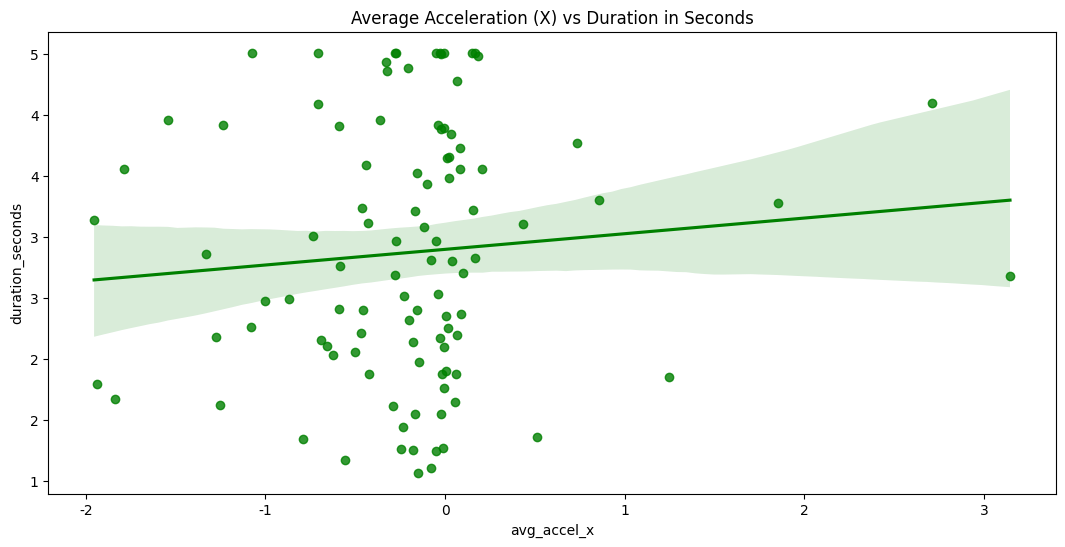

In [0]:
#Single relationship between Average Acceleration (X) and Duration in Seconds
plt.figure(figsize = (13, 6))
sns.regplot(data = signal_table,
            x = 'avg_accel_x',
            y = 'duration_seconds',
            color = 'green');

plt.title('Average Acceleration (X) vs Duration in Seconds')

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

The relationship between avg_grav_y and duration_seconds shows little to no trend, suggesting that acceleration including gravity in the Y direction does not influence the duration of a signal.

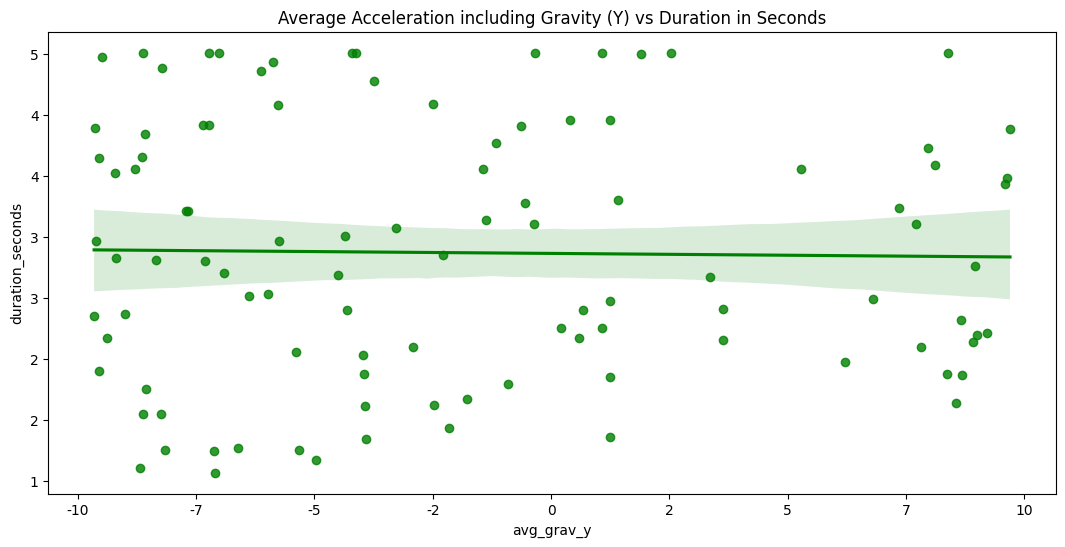

In [0]:
#Single relationship between Average Acceleration including Gravity (Y) and Duration in Seconds
plt.figure(figsize = (13, 6))
sns.regplot(data = signal_table,
            x = 'avg_grav_y',
            y = 'duration_seconds',
            color = 'green');

plt.title('Average Acceleration including Gravity (Y) vs Duration in Seconds')

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

The relationship between avg_rot_gamma and duration_seconds shows a moderate positive trend, suggesting that signals that have a higher rotation rate along the gamma axis tend to have a longer duration in seconds.

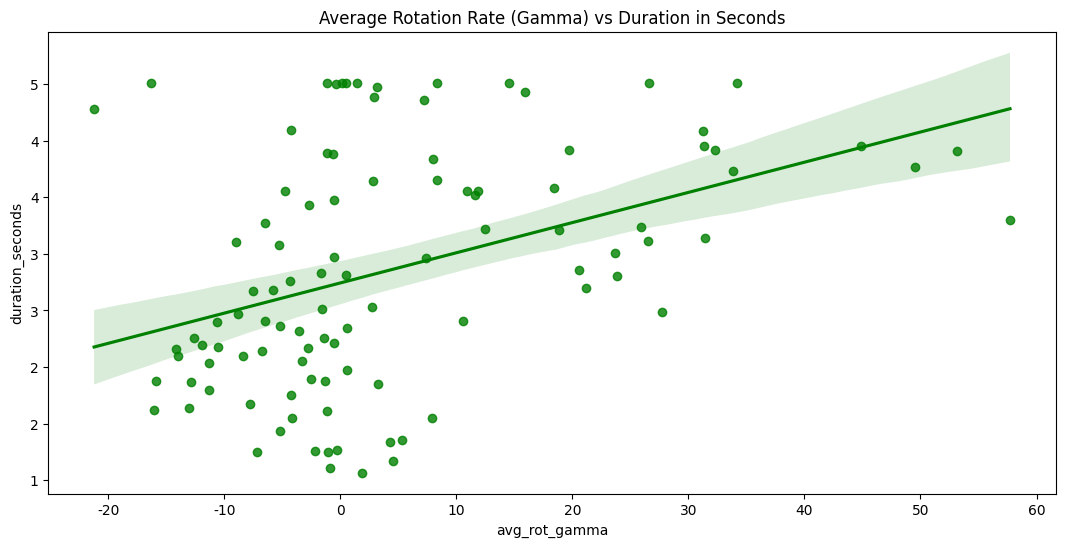

In [0]:
#Single relationship between Average Rotation Rate (Gamma) vs Duration in Seconds
plt.figure(figsize = (13, 6))
sns.regplot(data = signal_table,
            x = 'avg_rot_gamma',
            y = 'duration_seconds',
            color = 'green');

plt.title('Average Rotation Rate (Gamma) vs Duration in Seconds')

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

The median average acceleration in the X direction is fairly consistent across the three gesture plays, hovering around 0.

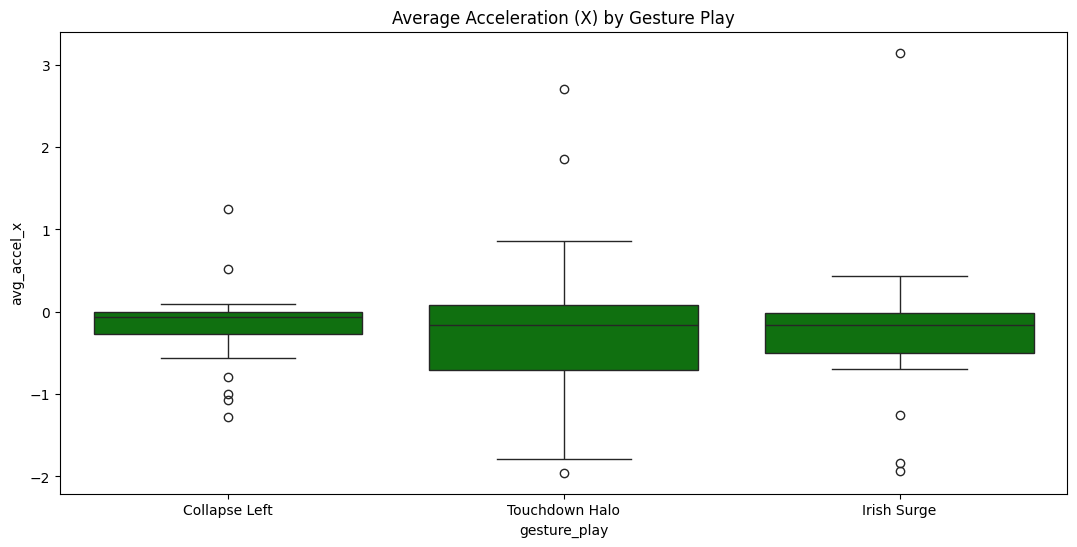

In [0]:
#Distribution of Average Acceleration (X) by Gesture Play
plt.figure(figsize=(13,6))
sns.boxplot(data=signal_table, 
            x='gesture_play', 
            y='avg_accel_x',
            color = 'green')

plt.title('Average Acceleration (X) by Gesture Play');

The median average acceleration, including gravity, in the Y direction is highest for the Irish Surge gesture play, with a median value near -1.

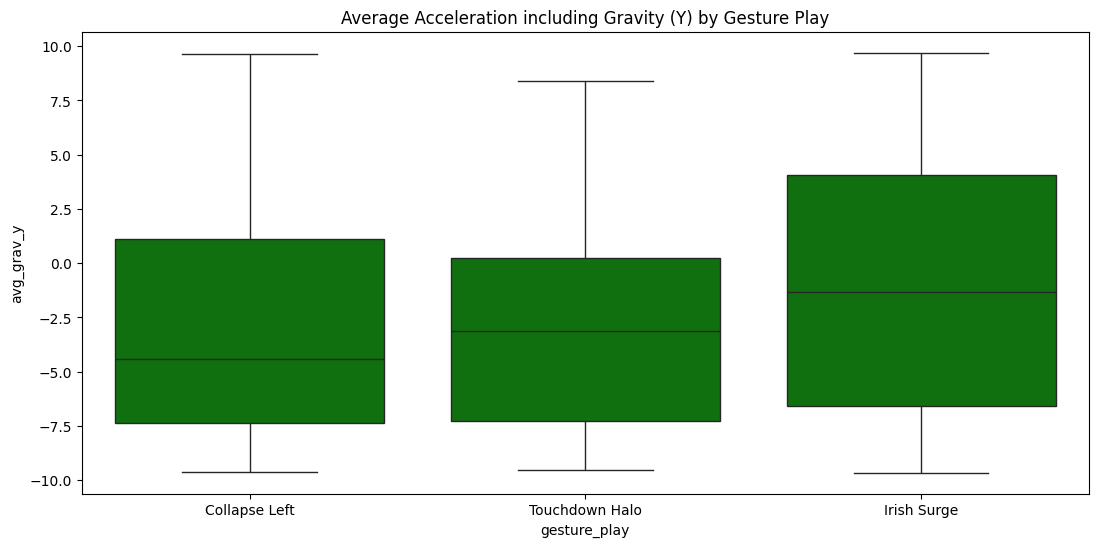

In [0]:
#Distribution of Average Acceleration including Gravity (Y) by Gesture Play
plt.figure(figsize=(13,6))
sns.boxplot(data=signal_table, 
            x='gesture_play', 
            y='avg_grav_y',
            color = 'green')

plt.title('Average Acceleration including Gravity (Y) by Gesture Play');

The median average rotation rate along the gamma axis is highest for the Touchdown Halo gesture play, with a median value near 20.

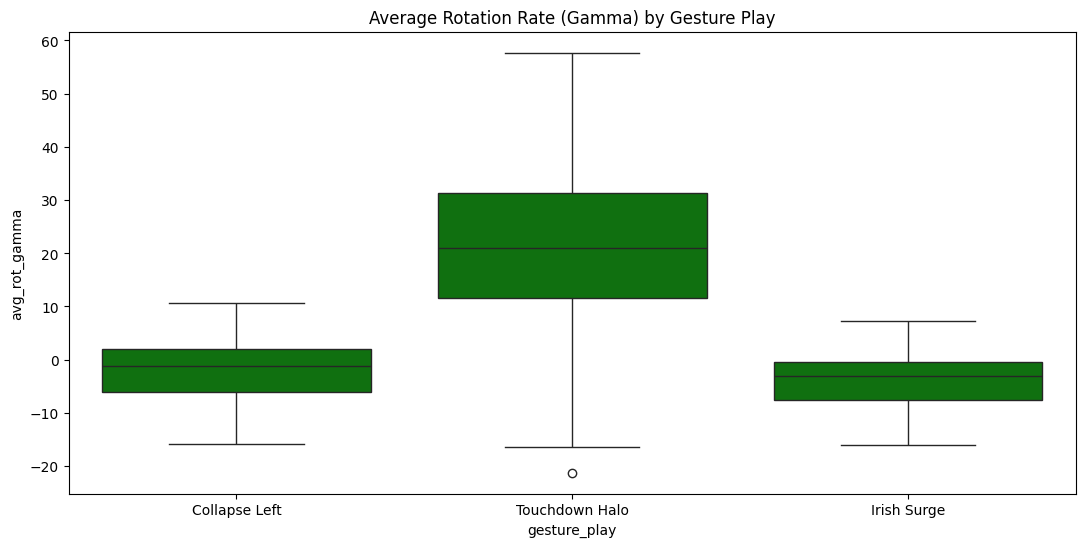

In [0]:
#Distribution of Average Rotation Rate (Gamma) by Gesture Play
plt.figure(figsize=(13,6))
sns.boxplot(data=signal_table, 
            x='gesture_play', 
            y='avg_rot_gamma',
            color = 'green')

plt.title('Average Rotation Rate (Gamma) by Gesture Play');

The heatmap reveals that most of the selected numeric engineered features exhibit weak positive or negative correlations. The one notable exception is the moderate positive correlation between avg_rot_gamma and duration_seconds.

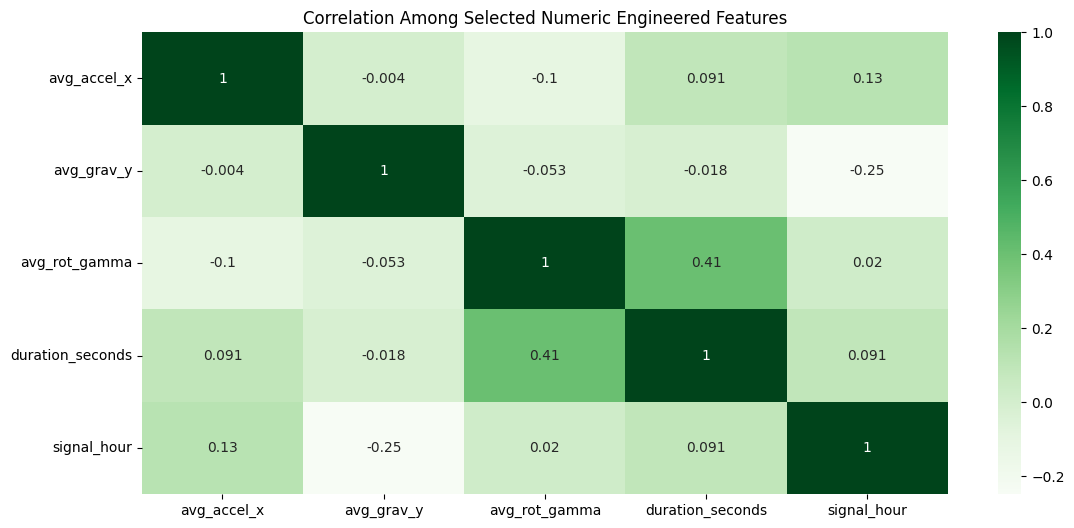

In [0]:
#Correlation among selected numeric engineered features
plt.figure(figsize=(13,6))
sns.heatmap(signal_table[['avg_accel_x', 'avg_grav_y', 'avg_rot_gamma', 'duration_seconds', 'signal_hour']].corr(),
            annot=True, cmap='Greens')

plt.title('Correlation Among Selected Numeric Engineered Features');

# Predictive Modeling

For the predictive modeling stage, I chose to use a Random Forest Classifier due to its ability to handle complex, non-linear relationships and its robustness to overfitting. Random forests are ensemble models that combine the predictions of multiple decision trees, making them well-suited for classification tasks with multiple input features. Given the nature of the engineered features and the potential interactions between them, the Random Forest may offer a good balance between accuracy and interpretability.

In [0]:
#Loading libraries to create random forest classifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

To predict the type of gesture play, I used a Random Forest Classifier. I selected a variety of engineered features related to acceleration, gravity, rotation, signal duration, and time of recording, signal_hour, as input variables, x. The target variable, y, was the gesture play label.

I split the data into training and testing sets using a 70/30 split to ensure the model could be evaluated on unseen data. Before training, I standardized the input features using StandardScaler to ensure all features were on a comparable scale, which can help improve model performance, especially for distance-based methods and ensure consistency in feature importance computation.

I then trained the Random Forest Classifier with 100 estimators and a fixed random seed for reproducibility. After fitting the model, I evaluated it on the test set and computed the accuracy score to measure how well the classifier performed on unseen data.

This approach was chosen because Random Forests are robust to overfitting, can model complex patterns, and naturally handle both linear and non-linear feature relationships, making them a strong candidate for this classification task.

After training the model on a 70/30 train-test split, the Random Forest achieved an accuracy of 83.87%, suggesting strong performance in correctly predicting the gesture play labels from the selected engineered features.

In [0]:
#Creating random forest classifier to predict the gesture plays
x = signal_table[['avg_accel_x', 'avg_accel_y', 'avg_accel_z',
    'avg_grav_x', 'avg_grav_y', 'avg_grav_z',
    'avg_rot_alpha', 'avg_rot_beta', 'avg_rot_gamma',
    'duration_seconds','signal_hour']]

y = signal_table['gesture_play']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1842)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

classifier = RandomForestClassifier(n_estimators = 100, random_state = 1842)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Uploading artifacts:   0%|          | 0/1 [00:00<?, ?it/s]

Accuracy: 83.87%


The confusion matrix heatmap shows that the model performed well across all gesture play classes. Specifically, the Collapse Left play was correctly predicted 8 times and misclassified once. The Irish Surge play was correctly identified 8 times, with 3 incorrect predictions. The Touchdown Halo play had the highest correct classification rate, with 10 correct predictions and only 1 misclassification.

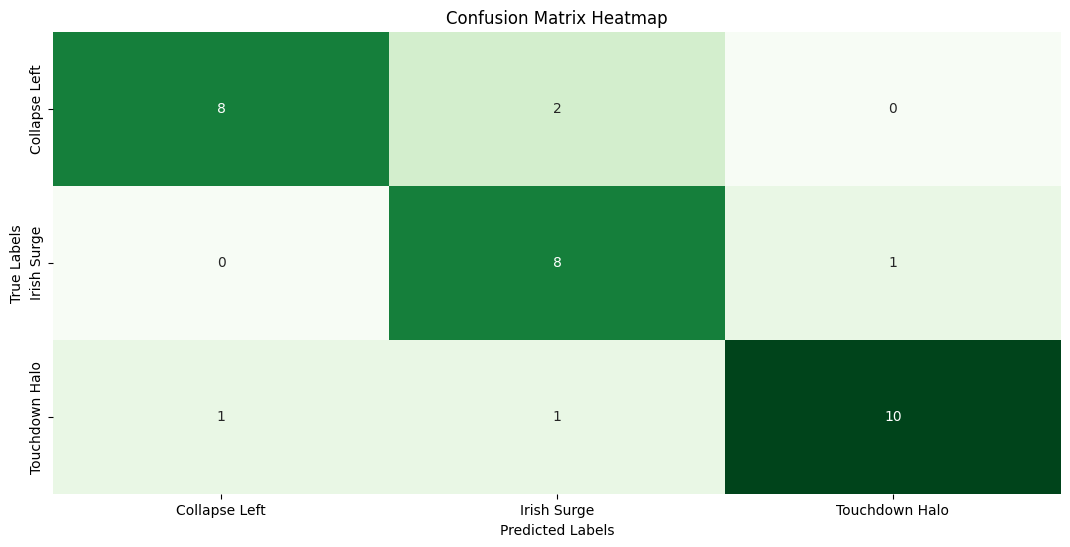

In [0]:
#Creating confusion matrix heatmap to assess the true and predicted labels of the gesture plays
labels = sorted(y.unique())
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(13, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Greens', cbar=False,
            xticklabels = labels, yticklabels = labels)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Based on the engineered feature importance graph, the average rotation rate along the alpha axis, avg_rot_alpha, contributed the most to the model’s predictions, indicating it played a key role in distinguishing between the different gesture plays.

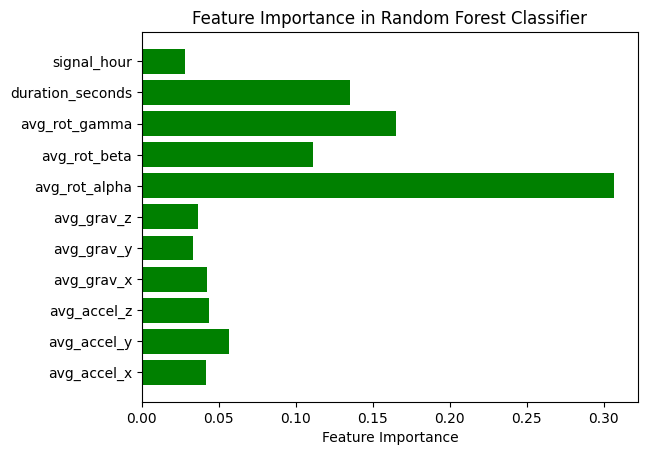

In [0]:
#Visualizing the importance of each engineered feature
feature_names = x.columns
feature_importances = classifier.feature_importances_

plt.barh(feature_names, feature_importances,
         color = 'green')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()